<a href="https://colab.research.google.com/github/natalia973/Data-Science-Data-Analytics/blob/main/Limpeza_e_tratamento_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as srn
import statistics as sts


In [34]:
dataset = pd.read_csv("/content/Churn.csv" , sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
dataset.shape  #Exibe o número de linhas e colunas

(999, 12)

In [40]:
#Atribuir nomes às colunas
dataset.columns =["Id" , "Score" , "Estado" , "Gênero" , "Idade" , "Patrimônio" , "Saldo" , "Produto", "TemCartãodeCrédito" , "Ativo" , "Salário" , "Saldo"]
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produto,TemCartãodeCrédito,Ativo,Salário,Saldo
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
#Exploração de dados nas colunas: Coluna-Estado
agrupar = dataset.groupby(["Estado"]).size()
agrupar


,0
Estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


<Axes: xlabel='Estado'>

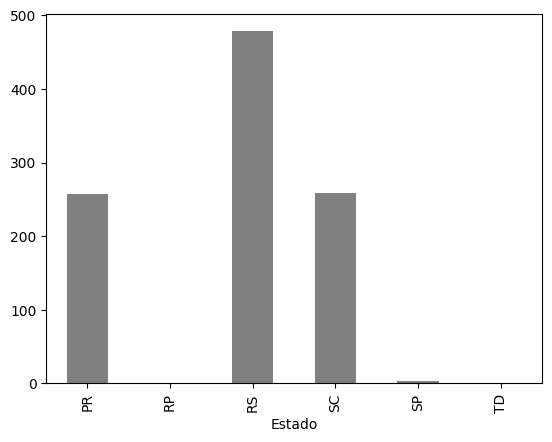

In [10]:
agrupar.plot.bar(color='gray')
#Gráfico de frequência dos Estados

In [13]:
#Exploração de dados da coluna Gênero
agrupar = dataset.groupby(['Gênero']).size()
agrupar


,0
Gênero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


<Axes: xlabel='Gênero'>

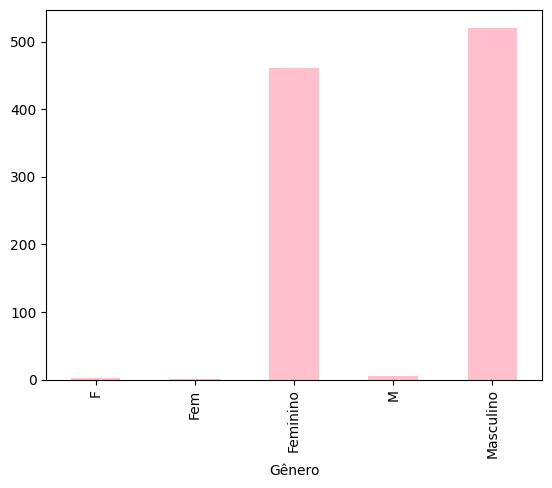

In [14]:
agrupar.plot.bar(color='pink') #Tabela da frequência de gênero

In [15]:
#Exploração da coluna "Score"
dataset["Score"].describe()

,Score
count,999.000000
mean,648.621622
std,98.264219
min,376.000000
25%,580.000000
50%,653.000000
75%,721.000000
max,850.000000


Text(0.5, 1.0, 'Score')

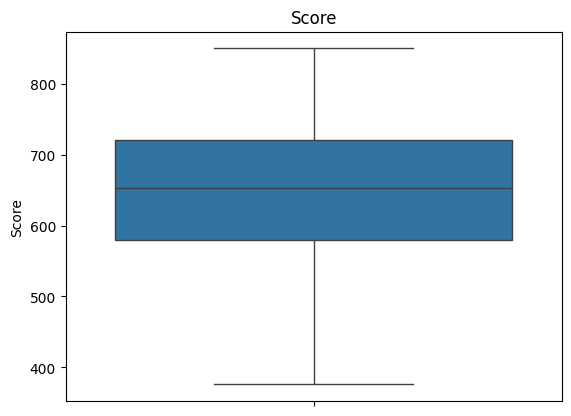

In [28]:
srn.boxplot(dataset['Score']).set_title('Score')

In [18]:
#Coluna da Idade
dataset['Idade'].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


Text(0.5, 1.0, 'Idade')

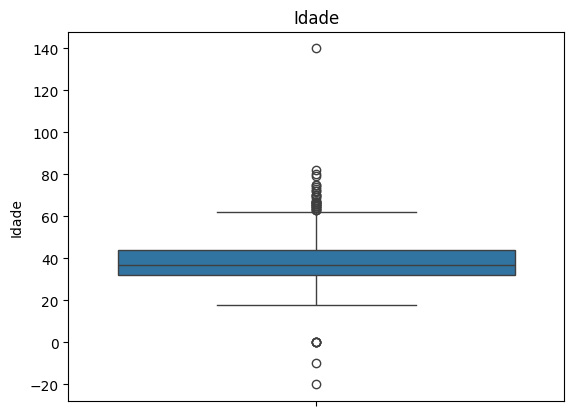

In [19]:
srn.boxplot(dataset['Idade']).set_title('Idade')
'''A função boxplot mostra  o limite inferior e superior, o traço no meio é a mediana
 e os pontos significam os valores discrepantes(outliers)'''


Text(0.5, 1.0, 'Idade')

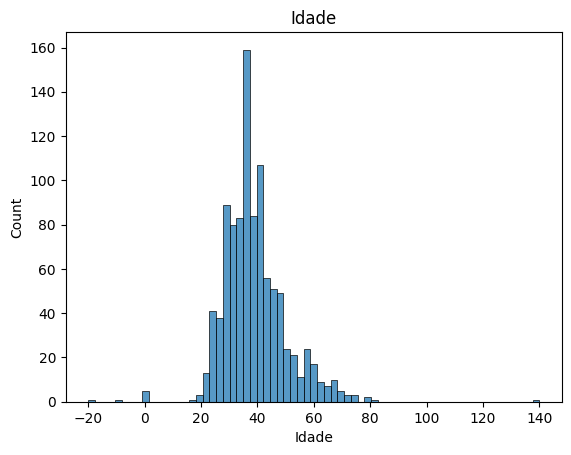

In [29]:
srn.histplot(dataset['Idade']).set_title('Idade')
#Histograma com as frequências das idades

In [30]:
#Contagem de valores NAs, não disponíveis
dataset.isnull().sum()

,0
Id,0
Score,0
Estado,0
Gênero,8
Idade,0
Patrimônio,0
Saldo,0
Produto,0
TemCartãodeCrédito,0
Ativo,0


In [41]:
#Cálculo da mediana da coluna "Salário"
mediana = sts.median(dataset['Salário'])
mediana

70518.0

In [51]:
#Substituindo NAN por mediana
#Primeiro será atribuído aos valores não disponíveis a mediana e depois é atribuído esse valor
dataset['Salário'] = dataset['Salário'].fillna(mediana)
dataset['Salário'].isnull().sum()

np.int64(0)

In [54]:
#Coluna de gênero, preencher os NAs masculinos

dataset['Gênero'] = dataset['Gênero'].fillna(agrupar)
dataset['Salário'].isnull().sum()


np.int64(0)

In [56]:
dataset.loc[dataset['Gênero'] == 'M' , 'Gênero'] = 'Masculino'
dataset.loc[dataset['Gênero'].isin(['Fem' , 'F']) , 'Gênero'] = 'Feminino'
#Visualização do resultado
agrupado = dataset.groupby(['Gênero']).size()
agrupado

,0
Gênero,
Feminino,464
Masculino,527


In [57]:
dataset['Idade'].describe()
#Detecção de valores anormais, como a idade sendo -20 e a idade igual a 140

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


In [59]:
#Visualização desses outliers
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]


,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produto,TemCartãodeCrédito,Ativo,Salário,Saldo
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [60]:
#Cálculo da mediana:
mediana=sts.median(dataset['Idade'])
mediana

37

In [63]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120) , 'Idade'] = mediana
dataset['Idade'].describe()


,Idade
count,999.000000
mean,38.903904
std,10.672421
min,0.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,82.000000
